## Honey Berk - DATA620 - Project 1

## Read in data and draw graph

Data was obtain as a graphml file, from a blog post referencing a post about using graph theory to analyze drug deals (https://blog.ouseful.info/2012/11/09/drug-deal-network-analysis-with-gephi-tutorial/).

Graph is bipartite and directed, consisting of customers who purchased drugs and drug deals (transactions).

First the entire directed network is graphed, then the network is transformed to an undirected network and graphed again. Communitities are extracted by extracting the two partitions; the deal network is selected for further analysis, as it has a number of categorical variables (offer data, discount, ready for use, product, minimum qty and origin).

Product is chosen as the categorical variable to study, and individual communities are extracted and graphed by product. (Product, in this case, is the type of drug dealt: coke, heroine, meth, ketamine, pcp, shrooms, vicodin, weed and x.)

For the purpose of this analysis, where the nodes are drug deals, the following assumptions were made:

- Deal nodes are, in effect, connected by customer. So, the higher degree, the more customers, the more purchases of that product.

- Degree Centrality = How many other deals each deal is related to, and therefore how many repeat customers there are.

- Eigencentrality = Lined to other important nodes, so contain customers who purchase more frequently, and therefore we can see products that were purchased more frequently.

The most striking finding is that weed purchases far outweigh any other type of drug purchases. Also, note lack of variation in coke sales.

In [119]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from scipy import stats
import numpy as np
from prettytable import PrettyTable

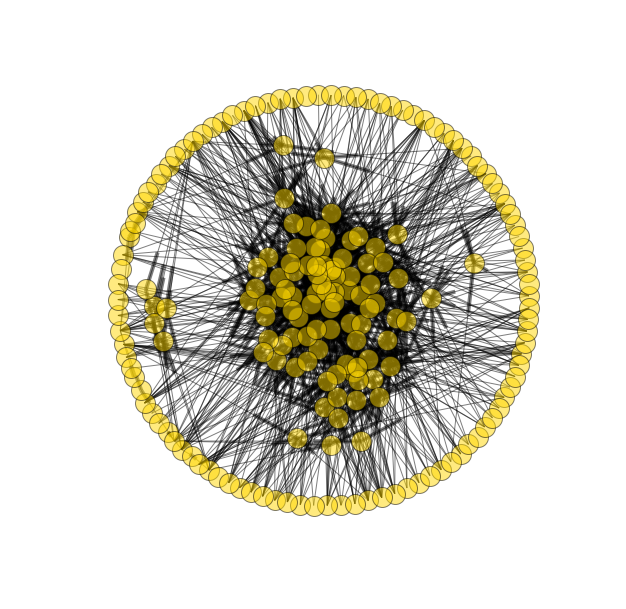

In [120]:
# Import Drug Deal network data
from networkx import read_graphml
K=read_graphml('inventory.graphml')

plt.figure(figsize=(8,8))
pos=nx.drawing.spring_layout(K)
nx.draw(K,pos,font_size=14,font_family='Verdana',font_weight='bold',node_size=400,node_color='gold',with_labels=False,alpha=0.5)

### Converted from directed graph to undirected.

In [121]:
K_ud = K.to_undirected()
K_components = nx.connected_component_subgraphs(K_ud)
nx.is_directed(K_ud)

False

## Find communities

In [122]:
import community

# Find modularity
part = community.best_partition(K_ud)
mod = community.modularity(part,K_ud)

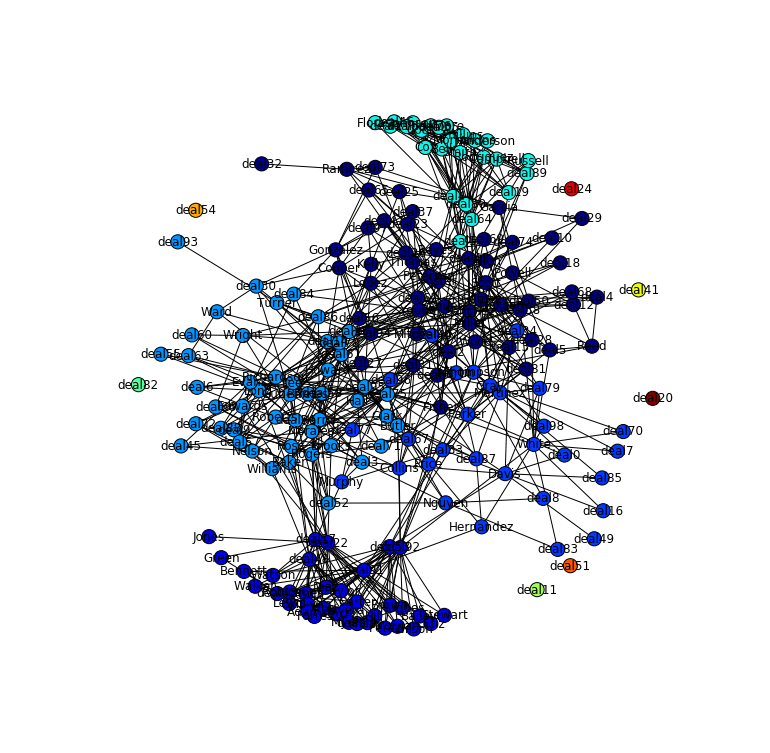

In [123]:
values = [part.get(node) for node in K_ud.nodes()]
plt.figure(figsize=(10,10))
pos=nx.drawing.spring_layout(K_ud)
nx.draw(K_ud, pos, cmap=plt.get_cmap('jet'), node_color = values, node_size=200, with_labels=True)

In [124]:
# Examine node data
print K_ud.nodes(data=True)[0:5]

[('Gonzalez', {'typ': u'customer'}), ('Wilson', {'typ': u'customer'}), ('Murphy', {'typ': u'customer'}), ('deal88', {'Origin': u'Venezuela', 'Minimum Qty kg': 851, 'Product': u'Weed', 'Ready for use': u'FALSE', 'Discount': 49, 'Offer date': u'02/08/2012', 'typ': u'deal'}), ('deal89', {'Origin': u'Russia', 'Minimum Qty kg': 932, 'Product': u'Coke', 'Ready for use': u'TRUE', 'Discount': 18, 'Offer date': u'02/08/2012', 'typ': u'deal'})]


## Extract Deal network

In [125]:
from networkx.algorithms import bipartite

bottom_nodes, top_nodes = bipartite.sets(K_ud)
bottom_nodes = set(K_ud) - top_nodes

In [126]:
# Extract Dealer network from bipartite graph
G = bipartite.projected_graph(K_ud, top_nodes)
G.edges()[0:5]

[('deal88', 'deal84'),
 ('deal88', 'deal86'),
 ('deal88', 'deal78'),
 ('deal88', 'deal66'),
 ('deal88', 'deal67')]

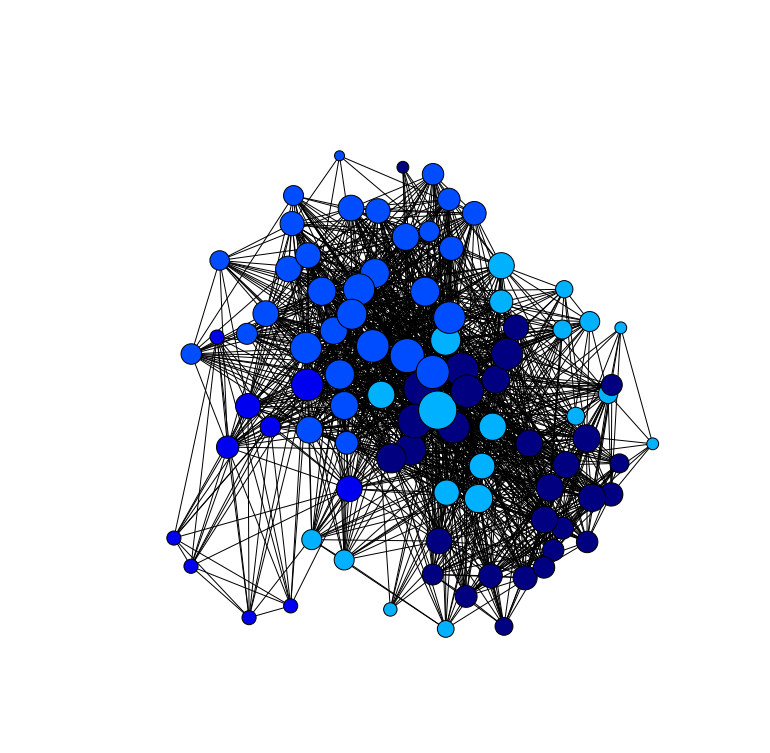

In [127]:
import community

# Find modularity
part = community.best_partition(G)
mod = community.modularity(part,G)
values = [part.get(node) for node in G.nodes()]

# Plot by modularity, by degree of node
d = nx.degree(G)
plt.figure(figsize=(10,10))
pos=nx.drawing.spring_layout(G, k=0.25,iterations=20)
nx.draw(G, pos, cmap=plt.get_cmap('jet'), node_color = values, node_size=[v * 20 for v in d.values()], with_labels=False)

## Community Graphs (Defined by product dealed)

In [128]:
Coke=[]
Heroin=[]
Ketamine=[]
Meth=[]
PCP=[]
Shrooms=[]
Vicodin=[]
Weed=[]
Xstasy=[]

for i,j in G.nodes_iter(data=True):
    if j['Product']=='Coke':
        Coke.append(i)
    elif j['Product']=='H':
        Heroin.append(i)
    elif j['Product']=='Ketamine':
        Ketamine.append(i)
    elif j['Product']=='Meth':
        Meth.append(i)
    elif j['Product']=='PCP':
        PCP.append(i)
    elif j['Product']=='Shrooms':
        Shrooms.append(i)
    elif j['Product']=='Vicodin':
        Vicodin.append(i)
    elif j['Product']=='Weed':
        Weed.append(i)
    elif j['Product']=='X':
        Xstasy.append(i)

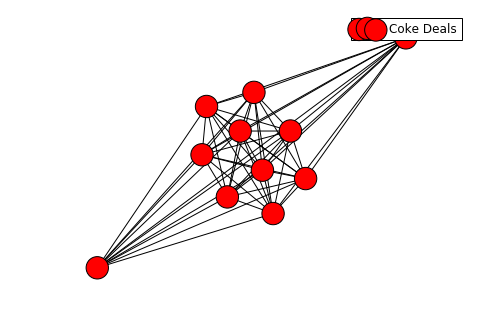

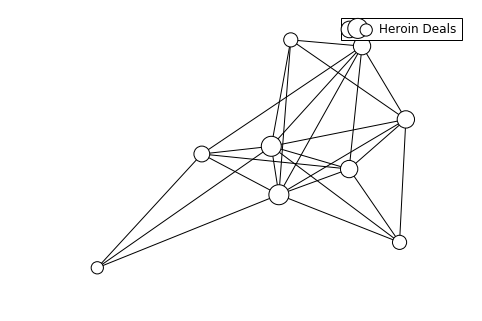

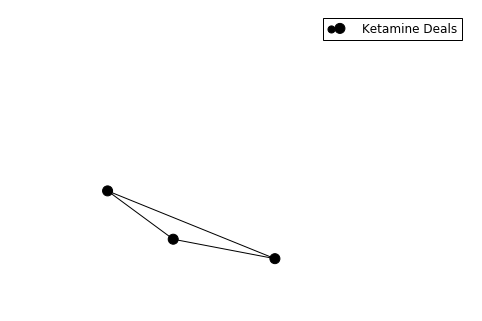

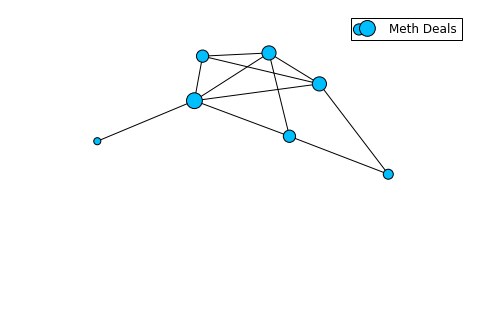

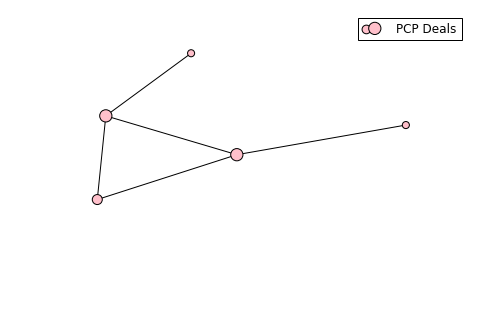

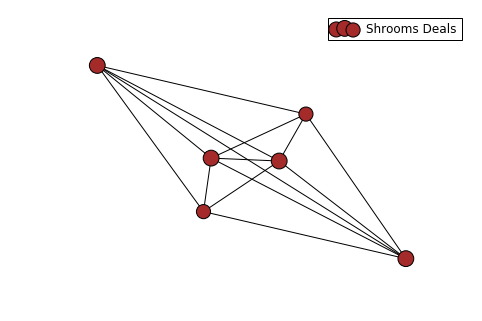

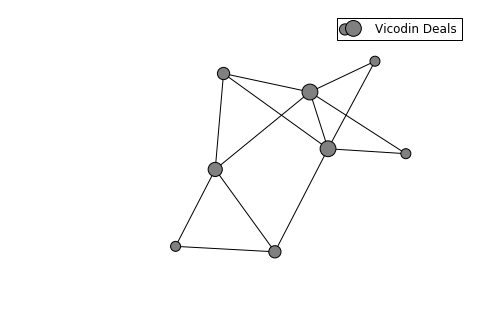

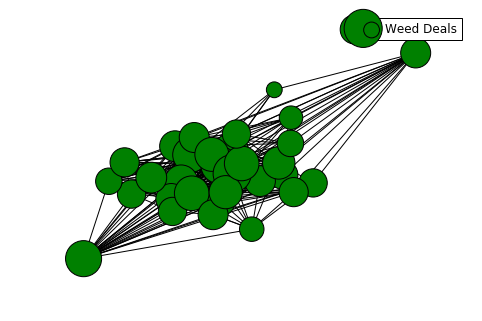

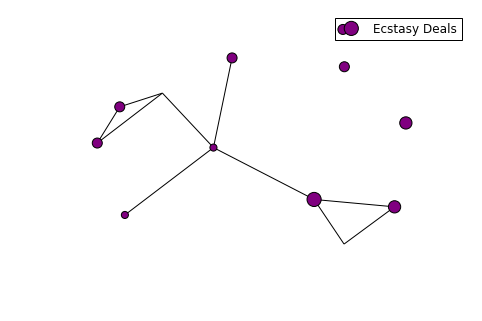

In [129]:
G_coke= G.subgraph(Coke)
d = nx.degree(G_coke)
nx.draw_spring(G_coke, label = 'Coke Deals', node_color='r', node_size=[v * 50 for v in d.values()])
plt.legend(["Coke Deals"])
plt.show()

G_heroin= G.subgraph(Heroin)
d = nx.degree(G_heroin)
nx.draw_spring(G_heroin, label = 'Heroin Deals', node_color='w', node_size=[v * 50 for v in d.values()])
plt.legend(["Heroin Deals"])
plt.show()

G_ketamine= G.subgraph(Ketamine)
d = nx.degree(G_ketamine)
nx.draw_spring(G_ketamine, label = 'Ketamine Deals', node_color='k', node_size=[v * 50 for v in d.values()])
plt.legend(["Ketamine Deals"])
plt.show()

G_meth= G.subgraph(Meth)
d = nx.degree(G_meth)
nx.draw_spring(G_meth, label = 'Meth Deals', node_color='deepskyblue', node_size=[v * 50 for v in d.values()])
plt.legend(["Meth Deals"])
plt.show()

G_pcp= G.subgraph(PCP)
d = nx.degree(G_pcp)
nx.draw_spring(G_pcp, label = 'PCP Deals', node_color = 'pink', node_size=[v * 50 for v in d.values()])
plt.legend(["PCP Deals"])
plt.show()

G_shrooms= G.subgraph(Shrooms)
d = nx.degree(G_shrooms)
nx.draw_spring(G_shrooms, label = 'PCP Deals', node_color = 'brown', node_size=[v * 50 for v in d.values()])
plt.legend(["Shrooms Deals"])
plt.show()

G_vicodin= G.subgraph(Vicodin)
d = nx.degree(G_vicodin)
nx.draw_spring(G_vicodin, label = 'Vicodin Deals', node_color = 'grey', node_size=[v * 50 for v in d.values()])
plt.legend(["Vicodin Deals"])
plt.show()

G_weed= G.subgraph(Weed)
d = nx.degree(G_weed)
nx.draw_spring(G_weed, label = 'Weed Deals', cmap=plt.get_cmap('jet'), node_color = 'g', node_size=[v * 50 for v in d.values()])
plt.legend(["Weed Deals"])
plt.show()

G_x= G.subgraph(Xstasy)
d = nx.degree(G_x)
nx.draw_spring(G_x, label = 'X Deals', node_color = 'purple', node_size=[v * 50 for v in d.values()])
plt.legend(["Ecstasy Deals"])
plt.show()


## Whole Network Statistics

In [130]:
# Number of nodes and edges
G_nodes = G.number_of_nodes()
G_edges = G.number_of_edges()
print 'There are %s nodes and %s edges in the Deal network.' % (G_nodes, G_edges)

There are 99 nodes and 1431 edges in the Deal network.


### Centrality Measures

In [131]:
dcent=nx.degree_centrality(G)
dcent_s=sorted(dcent.iteritems(),key=lambda(u,v):(-v,u))

ecent = nx.eigenvector_centrality(G)
ecent_s = sorted(ecent.iteritems(), key = lambda(u,v):(-v,u))

names1=[x[0] for x in dcent_s[:10]]
names2=[x[0] for x in ecent_s[:10]]
names=list(set(names1)|set(names2))

table=[[name,G.degree(name),round(dcent[name],4),round(ecent[name],4),G.node[name]['Product']] for name in names]

table=sorted(table,key=lambda x: -x[3])
pt = PrettyTable(['Node','Degree','Degree Centrality','Eigencentrality','Product'])
for i in range(0, len(table)):
    pt.add_row(table[i])
    
print pt

+--------+--------+-------------------+-----------------+---------+
|  Node  | Degree | Degree Centrality | Eigencentrality | Product |
+--------+--------+-------------------+-----------------+---------+
| deal75 |   73   |       0.7449      |      0.2031     |   Weed  |
| deal94 |   63   |       0.6429      |      0.1876     | Shrooms |
| deal90 |   58   |       0.5918      |      0.1732     |   Weed  |
| deal56 |   55   |       0.5612      |      0.1725     |   Weed  |
| deal15 |   57   |       0.5816      |      0.1725     |   Weed  |
| deal95 |   57   |       0.5816      |      0.1643     |   Weed  |
| deal78 |   53   |       0.5408      |      0.1631     | Shrooms |
| deal13 |   53   |       0.5408      |      0.1608     |    H    |
| deal31 |   50   |       0.5102      |      0.157      |   Weed  |
| deal61 |   51   |       0.5204      |      0.1541     | Shrooms |
+--------+--------+-------------------+-----------------+---------+


## Community Statistics (by product sold)

In [132]:
# Create function to generate categorical tables

def productstats(graph):
    # Degree Centrality
    dc=nx.degree_centrality(graph)
    dc_s=sorted(dc.iteritems(),key=lambda(u,v):(-v,u))

    # Eigenvector Centrality
    graph2 = nx.Graph(graph)
    ec=nx.eigenvector_centrality(graph2)
    ec_s=sorted(ec.iteritems(),key=lambda(u,v):(-v,u))

    # Table
    nom1=[x[0] for x in dc_s[:10]]
    nom2=[x[0] for x in ec_s[:10]]
    noms=list(set(nom1)|set(nom2))
    tbl=[[nom,graph.degree(nom),round(dc[nom],4),round(ec[nom],4),graph.node[nom]['Product']] for nom in noms]

    
    tbl=sorted(tbl,key=lambda x: -x[3])
    ptf = PrettyTable(['Node','Degree','Degree Centrality','Eigencentrality','Product'])
    for i in range(0, len(tbl)):
        ptf.add_row(tbl[i])
    print ptf

In [133]:
productstats(G_coke)

+--------+--------+-------------------+-----------------+---------+
|  Node  | Degree | Degree Centrality | Eigencentrality | Product |
+--------+--------+-------------------+-----------------+---------+
| deal64 |   10   |        1.0        |      0.3015     |   Coke  |
| deal76 |   10   |        1.0        |      0.3015     |   Coke  |
| deal44 |   10   |        1.0        |      0.3015     |   Coke  |
| deal46 |   10   |        1.0        |      0.3015     |   Coke  |
| deal59 |   10   |        1.0        |      0.3015     |   Coke  |
| deal35 |   10   |        1.0        |      0.3015     |   Coke  |
| deal21 |   10   |        1.0        |      0.3015     |   Coke  |
| deal80 |   10   |        1.0        |      0.3015     |   Coke  |
| deal1  |   10   |        1.0        |      0.3015     |   Coke  |
| deal19 |   10   |        1.0        |      0.3015     |   Coke  |
+--------+--------+-------------------+-----------------+---------+


In [134]:
productstats(G_heroin)

+--------+--------+-------------------+-----------------+---------+
|  Node  | Degree | Degree Centrality | Eigencentrality | Product |
+--------+--------+-------------------+-----------------+---------+
| deal42 |   8    |        1.0        |      0.423      |    H    |
| deal13 |   8    |        1.0        |      0.423      |    H    |
| deal23 |   6    |        0.75       |      0.3571     |    H    |
| deal97 |   6    |        0.75       |      0.3571     |    H    |
| deal4  |   6    |        0.75       |      0.3523     |    H    |
| deal25 |   5    |       0.625       |      0.2961     |    H    |
| deal68 |   4    |        0.5        |      0.2627     |    H    |
| deal12 |   4    |        0.5        |      0.2627     |    H    |
| deal29 |   3    |       0.375       |      0.1929     |    H    |
+--------+--------+-------------------+-----------------+---------+


In [135]:
productstats(G_ketamine)

+--------+--------+-------------------+-----------------+----------+
|  Node  | Degree | Degree Centrality | Eigencentrality | Product  |
+--------+--------+-------------------+-----------------+----------+
| deal28 |   2    |        0.5        |      0.5774     | Ketamine |
| deal83 |   2    |        0.5        |      0.5774     | Ketamine |
| deal7  |   2    |        0.5        |      0.5774     | Ketamine |
| deal91 |   0    |        0.0        |       0.0       | Ketamine |
| deal69 |   0    |        0.0        |       0.0       | Ketamine |
+--------+--------+-------------------+-----------------+----------+


In [136]:
productstats(G_meth)

+--------+--------+-------------------+-----------------+---------+
|  Node  | Degree | Degree Centrality | Eigencentrality | Product |
+--------+--------+-------------------+-----------------+---------+
| deal53 |   5    |       0.5556      |      0.4994     |   Meth  |
| deal40 |   4    |       0.4444      |      0.4687     |   Meth  |
| deal98 |   4    |       0.4444      |      0.4435     |   Meth  |
| deal0  |   3    |       0.3333      |      0.3959     |   Meth  |
| deal70 |   3    |       0.3333      |      0.3325     |   Meth  |
| deal38 |   2    |       0.2222      |      0.2176     |   Meth  |
| deal39 |   1    |       0.1111      |       0.14      |   Meth  |
| deal41 |   0    |        0.0        |       0.0       |   Meth  |
| deal32 |   0    |        0.0        |       0.0       |   Meth  |
| deal51 |   0    |        0.0        |       0.0       |   Meth  |
+--------+--------+-------------------+-----------------+---------+


In [137]:
productstats(G_pcp)

+--------+--------+-------------------+-----------------+---------+
|  Node  | Degree | Degree Centrality | Eigencentrality | Product |
+--------+--------+-------------------+-----------------+---------+
| deal74 |   3    |        0.6        |      0.5651     |   PCP   |
| deal26 |   3    |        0.6        |      0.5651     |   PCP   |
| deal18 |   2    |        0.4        |      0.4908     |   PCP   |
| deal73 |   1    |        0.2        |      0.2454     |   PCP   |
| deal5  |   1    |        0.2        |      0.2454     |   PCP   |
| deal82 |   0    |        0.0        |       0.0       |   PCP   |
+--------+--------+-------------------+-----------------+---------+


In [138]:
productstats(G_shrooms)

+--------+--------+-------------------+-----------------+---------+
|  Node  | Degree | Degree Centrality | Eigencentrality | Product |
+--------+--------+-------------------+-----------------+---------+
| deal61 |   5    |        1.0        |      0.4284     | Shrooms |
| deal78 |   5    |        1.0        |      0.4284     | Shrooms |
| deal94 |   5    |        1.0        |      0.4284     | Shrooms |
| deal22 |   5    |        1.0        |      0.4284     | Shrooms |
| deal48 |   4    |        0.8        |      0.3645     | Shrooms |
| deal9  |   4    |        0.8        |      0.3645     | Shrooms |
+--------+--------+-------------------+-----------------+---------+


In [139]:
productstats(G_vicodin)

+--------+--------+-------------------+-----------------+---------+
|  Node  | Degree | Degree Centrality | Eigencentrality | Product |
+--------+--------+-------------------+-----------------+---------+
| deal79 |   5    |       0.625       |      0.4898     | Vicodin |
| deal34 |   5    |       0.625       |      0.4711     | Vicodin |
| deal47 |   4    |        0.5        |      0.3726     | Vicodin |
| deal62 |   3    |       0.375       |      0.3725     | Vicodin |
| deal65 |   3    |       0.375       |      0.2872     | Vicodin |
| deal87 |   2    |        0.25       |      0.2684     | Vicodin |
| deal50 |   2    |        0.25       |      0.2684     | Vicodin |
| deal10 |   2    |        0.25       |      0.1843     | Vicodin |
| deal54 |   0    |        0.0        |       0.0       | Vicodin |
+--------+--------+-------------------+-----------------+---------+


In [140]:
productstats(G_weed)

+--------+--------+-------------------+-----------------+---------+
|  Node  | Degree | Degree Centrality | Eigencentrality | Product |
+--------+--------+-------------------+-----------------+---------+
| deal75 |   29   |       0.9667      |      0.254      |   Weed  |
| deal15 |   28   |       0.9333      |      0.2425     |   Weed  |
| deal36 |   26   |       0.8667      |      0.2355     |   Weed  |
| deal86 |   25   |       0.8333      |      0.2227     |   Weed  |
| deal58 |   24   |        0.8        |      0.2199     |   Weed  |
| deal17 |   24   |        0.8        |      0.2189     |   Weed  |
| deal14 |   23   |       0.7667      |      0.2077     |   Weed  |
| deal95 |   23   |       0.7667      |      0.2068     |   Weed  |
| deal3  |   22   |       0.7333      |      0.2059     |   Weed  |
| deal57 |   22   |       0.7333      |      0.1986     |   Weed  |
+--------+--------+-------------------+-----------------+---------+


In [141]:
productstats(G_x)

+--------+--------+-------------------+-----------------+---------+
|  Node  | Degree | Degree Centrality | Eigencentrality | Product |
+--------+--------+-------------------+-----------------+---------+
| deal92 |   4    |       0.3636      |      0.4964     |    X    |
| deal2  |   3    |       0.2727      |      0.4231     |    X    |
| deal16 |   3    |       0.2727      |      0.4231     |    X    |
| deal49 |   2    |       0.1818      |      0.2814     |    X    |
| deal81 |   2    |       0.1818      |      0.2814     |    X    |
| deal37 |   2    |       0.1818      |      0.2814     |    X    |
| deal85 |   2    |       0.1818      |      0.2814     |    X    |
| deal43 |   1    |       0.0909      |      0.1983     |    X    |
| deal8  |   1    |       0.0909      |      0.1983     |    X    |
| deal11 |   0    |        0.0        |       0.0       |    X    |
+--------+--------+-------------------+-----------------+---------+


In [142]:
# Centrality
dcc=nx.degree_centrality(G_coke)
ecc=nx.eigenvector_centrality(nx.Graph(G_coke))

dch=nx.degree_centrality(G_heroin)
ech=nx.eigenvector_centrality(nx.Graph(G_heroin))

dck=nx.degree_centrality(G_ketamine)
eck=nx.eigenvector_centrality(nx.Graph(G_ketamine))

dcm=nx.degree_centrality(G_meth)
ecm=nx.eigenvector_centrality(nx.Graph(G_meth))

dcp=nx.degree_centrality(G_pcp)
ecp=nx.eigenvector_centrality(nx.Graph(G_meth))

dcs=nx.degree_centrality(G_shrooms)
ecs=nx.eigenvector_centrality(nx.Graph(G_shrooms))

dcv=nx.degree_centrality(G_vicodin)
ecv=nx.eigenvector_centrality(nx.Graph(G_vicodin))

dcw=nx.degree_centrality(G_weed)
ecw=nx.eigenvector_centrality(nx.Graph(G_weed))

dcx=nx.degree_centrality(G_x)
ecx=nx.eigenvector_centrality(nx.Graph(G_x))

In [143]:
dcca=[]
dcha=[]
dcka=[]
dcma=[]
dcpa=[]
dcsa=[]
dcva=[]
dcwa=[]
dcxa=[]

for key, value in dcc.items():
    dcca.append(value)
    
for key, value in dch.items():
    dcha.append(value)
    
for key, value in dck.items():
    dcka.append(value)
    
for key, value in dcm.items():
    dcma.append(value)
    
for key, value in dcp.items():
    dcpa.append(value)
    
for key, value in dcs.items():
    dcsa.append(value)
    
for key, value in dcv.items():
    dcva.append(value)
    
for key, value in dcw.items():
    dcwa.append(value)
    
for key, value in dcx.items():
    dcxa.append(value)

### A one-way ANOVA run on all of the communities for degree centrality shows that they are all statistically different.

In [144]:
# compute one-way ANOVA P value (p > 0.05, not statistically different)  
from scipy import stats  
      
f_val, p_val = stats.f_oneway(dcca, dcha, dcka, dcma, dcpa, dcsa, dcva, dcwa, dcxa)  
  
print "One-way ANOVA P =", p_val  

One-way ANOVA P = 4.87048782988e-22


In [145]:
### T-tests on a few combinations of communities also show varying degrees of statistical difference in the communities.

In [146]:
stats.ttest_ind(dcwa, dcca) # weed vs. cocaine - SIGNIFICANT DIFFERENCE

Ttest_indResult(statistic=-7.1570575156895906, pvalue=1.1345832289384486e-08)

In [147]:
stats.ttest_ind(dcwa, dcha) # weed vs. heroine - NOT STATISTICALLY DIFFERENT

Ttest_indResult(statistic=-0.93837792402237175, pvalue=0.35397668849652253)

In [148]:
stats.ttest_ind(dcwa, dcma) # weed vs. meth - SIGNIFICANT DIFFERENCE

Ttest_indResult(statistic=5.905568503284413, pvalue=7.0052741416669008e-07)

In [149]:
stats.ttest_ind(dcwa, dcpa) # weed vs. PCP - NOT STATISTICALLY DIFFERENT

Ttest_indResult(statistic=3.6537532244129456, pvalue=0.00083894678104411971)